In [ ]:
#--------------------------------importing the data--------------------------------------------

In [5]:
import pandas as pd
import numpy as np
df=pd.read_csv("D:\\ExcelR Assignments\\Assignment 6\\ToyotaCorolla - MLR.csv")
print(df.isnull().sum())
df

Price        0
Age_08_04    0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64


,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


In [7]:
df.dtypes

Price         int64
Age_08_04     int64
KM            int64
Fuel_Type    object
HP            int64
Automatic     int64
cc            int64
Doors         int64
Cylinders     int64
Gears         int64
Weight        int64
dtype: object

In [ ]:
#---------------------------------------------------EDA-------------------------------------------------------------

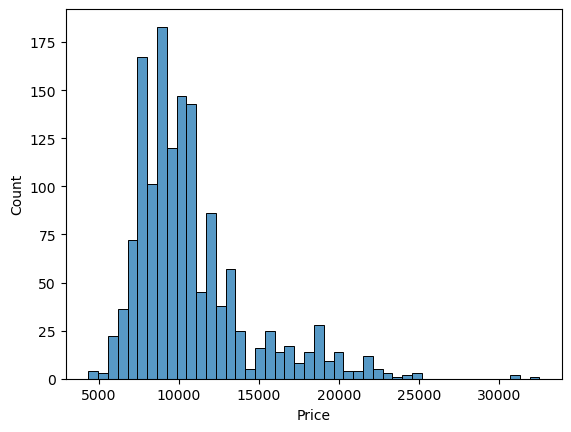

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.055710,1576.85585,4.033426,4.0,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.229441,424.38677,0.952677,0.0,0.188510,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.00000,2.000000,4.0,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.00000,3.000000,4.0,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,0.000000,1600.00000,4.000000,4.0,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,0.000000,1600.00000,5.000000,4.0,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.00000,5.000000,4.0,6.000000,1615.00000


In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df["Price"])
plt.show()

df.describe()

In [15]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
df["Fuel_Type"] = le.fit_transform(df["Fuel_Type"])
df.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,1,90,0,2000,3,4,5,1165
1,13750,23,72937,1,90,0,2000,3,4,5,1165
2,13950,24,41711,1,90,0,2000,3,4,5,1165
3,14950,26,48000,1,90,0,2000,3,4,5,1165
4,13750,30,38500,1,90,0,2000,3,4,5,1170


In [ ]:
#------------------------------------------splitting the dataset-------------------------------------------------------

In [17]:
from sklearn.model_selection import train_test_split

Y=df["Price"]
X = df.drop("Price", axis=1) 

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [73]:
# grid search cv
# Set up the grid of alpha values to search over
alpha_values = {'alpha': [0.01, 0.1,0.5, 1,1.5,2,2.5,3,3.5,4,5,7,8 ]}

# Use GridSearchCV to find the best alpha
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=Lasso(), param_grid=alpha_values,scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train, Y_train)

# Get the best alpha value
best_alpha = grid_search.best_params_['alpha']
print(f"Best alpha value found: {best_alpha}")

Best alpha value found: 0.01


In [ ]:
#--------------------------------------------3 different models and their metics---------------------------------------------------

In [51]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error,r2_score

In [89]:
# model 1

model1 = LinearRegression()
model1.fit(X_train, Y_train)

Y_pred1 = model1.predict(X_test)
rmse1 = root_mean_squared_error(Y_test, Y_pred1)
r2_1 = r2_score(Y_test, Y_pred1)
print("Model 1 RMSE:", rmse1, "R2:", r2_1)

d1 = pd.DataFrame(list(X))
d2 = pd.DataFrame(model1.coef_)
pd.concat([d1,d2],axis=1)

Model 1 RMSE: 1582.7111491463615 R2: 0.8009523494127274


,0,0
0,Age_08_04,-1.159221e+02
1,KM,-1.720419e-02
2,Fuel_Type,1.447265e+03
3,HP,1.758401e+01
4,Automatic,1.322270e+02
5,cc,-1.271688e-01
6,Doors,-8.750260e+01
7,Cylinders,4.547474e-13
8,Gears,5.930432e+02
9,Weight,2.927977e+01


In [87]:
# model 2

X_train_new = X_train[["Age_08_04", "KM", "HP", "cc", "Weight"]]  # Select relevant features
X_test_new = X_test[["Age_08_04", "KM", "HP", "cc", "Weight"]]
model2 = LinearRegression()
model2.fit(X_train_new, Y_train)

print("model2 coefficients:",model2.coef_)
Y_pred2 = model2.predict(X_test_new)
rmse2 = root_mean_squared_error(Y_test, Y_pred2)
r2_2 = r2_score(Y_test, Y_pred2)
print("Model 2 RMSE:", rmse2, "R2:", r2_2)

d1 = pd.DataFrame(list(X))
d2 = pd.DataFrame(model2.coef_)
pd.concat([d1,d2],axis=1)

model2 coefficients: [-1.15408215e+02 -2.16484219e-02  3.20381006e+01 -1.52731270e-01
  2.25434325e+01]
Model 2 RMSE: 1453.3734594649034 R2: 0.8321550872112962


,0,0
0,Age_08_04,-115.408215
1,KM,-0.021648
2,Fuel_Type,32.038101
3,HP,-0.152731
4,Automatic,22.543433
5,cc,NaN
6,Doors,NaN
7,Cylinders,NaN
8,Gears,NaN
9,Weight,NaN


In [ ]:
#-------------------------------------------------Lasso and Ridge regressions-----------------------------------------

In [91]:
# model 3

from sklearn.linear_model import Lasso

model3 = Lasso(alpha=0.01)  # Adjust alpha for regularization strength
model3.fit(X_train, Y_train)

Y_pred3 = model3.predict(X_test)
rmse3 = root_mean_squared_error(Y_test, Y_pred3)
r2_3 = r2_score(Y_test, Y_pred3)
print("Model 3 RMSE:", rmse3, "R2:", r2_3)

d1 = pd.DataFrame(list(X))
d2 = pd.DataFrame(model3.coef_)
pd.concat([d1,d2],axis=1)

Model 3 RMSE: 1582.6924909937536 R2: 0.8009570424226327


,0,0
0,Age_08_04,-115.921579
1,KM,-0.017205
2,Fuel_Type,1447.111489
3,HP,17.586169
4,Automatic,132.023012
5,cc,-0.127165
6,Doors,-87.497302
7,Cylinders,0.000000
8,Gears,592.741747
9,Weight,29.279199


In [93]:
from sklearn.linear_model import Ridge
RR = Ridge(alpha=0.01)

X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size = 0.3, random_state=100)

RR.fit(X_train,Y_train)
RR.coef_

d1 = pd.DataFrame(list(X))
d2 = pd.DataFrame(RR.coef_)
pd.concat([d1,d2],axis=1)

,0,0
0,Age_08_04,-115.922037
1,KM,-0.017205
2,Fuel_Type,1446.999330
3,HP,17.586847
4,Automatic,132.222031
5,cc,-0.127175
6,Doors,-87.494358
7,Cylinders,0.000000
8,Gears,592.894050
9,Weight,29.278562


In [ ]:
'''
-From the above 3 models,model 2 is the best model.Because it contains lowest root mean squared errors and higest R2 score
compared to the other 2 models.
-Based on the results of Lasso and Ridge regressions,we can neglect the X variables like KM,CC and Cylinders as they are
nearer to zero.
-Removing these x variables improves the performance of the model.
'''

Interview Questions :

In [ ]:
'''
1.What is Normalization & Standardization and how is it helpful?

Normalization and standardization are techniques for rescaling data to improve machine learning model performance. 
Normalization scales data to a specific range, typically [0, 1], preserving relative proportions. 
It’s useful when features have varying units or scales. 
Standardization transforms data to have a mean of 0 and a standard deviation of 1, centering it around zero. 
It’s beneficial for algorithms sensitive to feature distributions, like logistic regression or SVMs.
Both methods enhance model convergence and accuracy by preventing features with larger scales from dominating others, 
ensuring fair contribution during training. The choice depends on the algorithm and dataset characteristics.

2.What techniques can be used to address multicollinearity in multiple linear regression?

Multicollinearity in multiple linear regression can be addressed using the following techniques:

Variance Inflation Factor (VIF): Identify highly correlated variables using VIF and remove or transform them.
Regularization Methods: Apply Lasso or Ridge regression, which add penalties to control feature importance.
Principal Component Analysis (PCA): Transform correlated variables into uncorrelated principal components.
Domain Knowledge: Use domain expertise to drop redundant features.
Combine Variables: Create new composite variables to reduce redundancy.
Partial Least Squares (PLS): A regression technique designed for highly collinear data.
These methods improve model interpretability and stability.
'''